In [1]:
import os

import math
import numpy as np
from numpy import random
import pandas as pd

import torch
from tqdm import tqdm
import matplotlib.pyplot as plt

from diffusion.data_util import get_ckpt_path, show_out_images, get_logger_path, train_plot, img_plot
from diffusion.script_util import ModelType, VarType
from diffusion.lightning_modules import DiffusionWithModel, MNISTDataModule
from diffusion.vgg5 import VGG5

c:\Users\niels\anaconda3\envs\bachelor\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


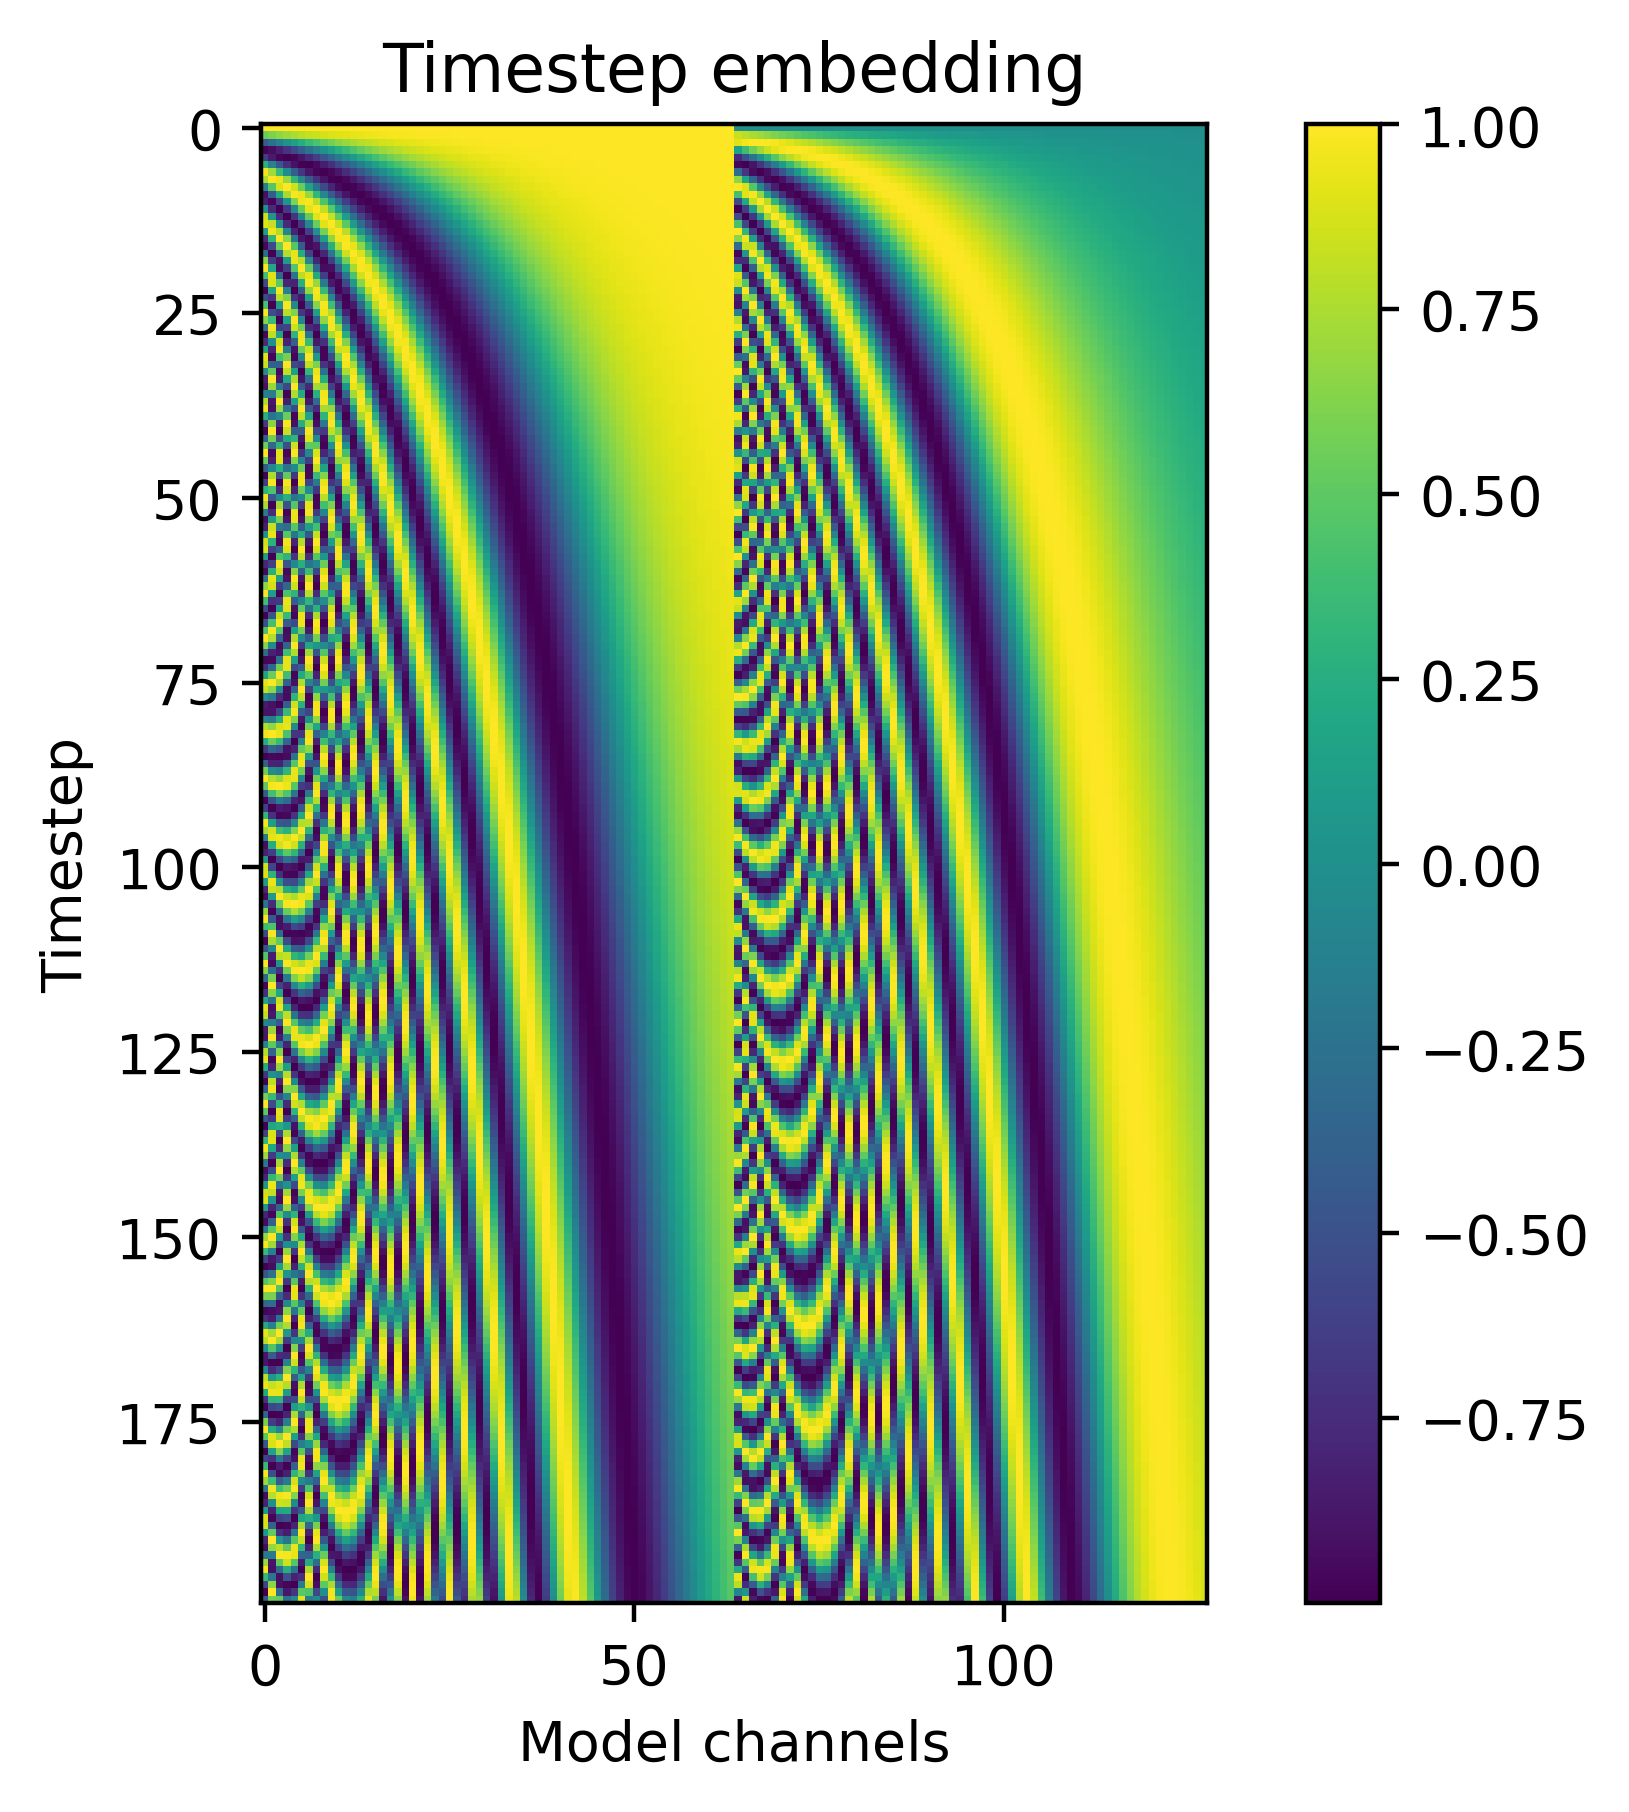

In [2]:
# get time embedding img
from diffusion.diffusion import Diffusion
from diffusion.unet import SimpleUNet

time_embed_max_period = 200
max_timestep = 200
model_channels = 128

diffusion = Diffusion()
unet = SimpleUNet(1, model_channels, 1, None, None, time_embed_max_period=time_embed_max_period)

emb_picture = list()
for i in range(max_timestep):
    t = torch.tensor((i,))
    emb = unet.timestep_embedding(t)
    emb_picture.append(emb.numpy()[0])
emb_picture = np.array(emb_picture)

fig, ax = plt.subplots(dpi=400)
img = ax.imshow(emb_picture)
ax.set_xlabel('Model channels')
ax.set_ylabel('Timestep')
ax.set_title('Timestep embedding')
fig.colorbar(img)